# Midterm Exam 
<br> Radley Ciego </br>
<br> November 7, 2022 </br>
<br> GTECH 78518: Environmental Data Science </br>

<b> Resesarch Question: </b> What impact, if any, did the MillionTreesNYC initiative have on air quality in New York City?

In [1]:
import pandas as pd
import numpy as np
import pdb
import matplotlib.pyplot as plt

## <b> Data Processing & Analysis: </b> EPA Air Quality and NYC Parks Department Tree Census Data

In [2]:
# read the site listing data - https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI   
sites = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/aqs_sites.zip')

In [3]:
# preview airquality data
sites.head()

,State Code,County Code,Site Number,Latitude,Longitude,Datum,Elevation,Land Use,Location Setting,Site Established Date,...,Owning Agency,Local Site Name,Address,Zip Code,State Name,County Name,City Name,CBSA Name,Tribe Name,Extraction Date
0,01,1,1,32.437458,-86.472891,WGS84,64.0,RESIDENTIAL,SUBURBAN,1974-05-01,...,Al Dept Of Env Mgt,NaN,"KING ARTHUR TRAILER COURT, PRATTVILLE,AL",36067.0,Alabama,Autauga,Prattville,"Montgomery, AL",NaN,2022-06-02
1,01,1,2,32.428470,-86.443585,WGS84,0.0,AGRICULTURAL,RURAL,1980-01-01,...,Al Dept Of Env Mgt,NaN,COUNTY RD 4 PRATTVILLE EXPERIMENT ST,NaN,Alabama,Autauga,Prattville,"Montgomery, AL",NaN,2022-06-02
2,01,1,3,32.332659,-86.791521,WGS84,41.0,FOREST,RURAL,1989-08-31,...,Al Dept Of Env Mgt,NaN,"1170 COUNTY RD.15 SO., SELMA, AL. 36701",36003.0,Alabama,Autauga,Not in a City,"Montgomery, AL",NaN,2022-06-02
3,01,3,1,0.000000,0.000000,NAD27,0.0,UNKNOWN,RURAL,1959-01-01,...,US EPA National Exposure Research Lab,NaN,CHANDLER RESIDENCE FT MORGAN STATE PARK,NaN,Alabama,Baldwin,Not in a city,"Daphne-Fairhope-Foley, AL",NaN,2022-06-02
4,01,3,2,30.552367,-87.706911,WGS84,0.0,COMMERCIAL,RURAL,1974-01-01,...,Al Dept Of Env Mgt,NaN,COR PENNSYLVANIA & CHICAGO (ROBERTSDALE),36567.0,Alabama,Baldwin,Robertsdale,"Daphne-Fairhope-Foley, AL",NaN,2022-06-02


In [4]:
type(sites)
sites.shape
sites.columns

Index(['State Code', 'County Code', 'Site Number', 'Latitude', 'Longitude',
       'Datum', 'Elevation', 'Land Use', 'Location Setting',
       'Site Established Date', 'Site Closed Date', 'Met Site State Code',
       'Met Site County Code', 'Met Site Site Number', 'Met Site Type',
       'Met Site Distance', 'Met Site Direction', 'GMT Offset',
       'Owning Agency', 'Local Site Name', 'Address', 'Zip Code', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Tribe Name',
       'Extraction Date'],
      dtype='object')

In [5]:
# read the tree census data
tree15 = pd.read_csv('http://www.geography.hunter.cuny.edu/~wenge/EDS2022F/data/NYCtree/2015_Street_Tree_Census.csv')
tree05 = pd.read_csv('http://www.geography.hunter.cuny.edu/~wenge/EDS2022F/data/NYCtree/2005_Street_Tree_Census.csv')

/var/folders/ff/9n9lg70d5d79jcc1pfmzhbsc0000gn/T/ipykernel_27249/2896106599.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  tree05 = pd.read_csv('http://www.geography.hunter.cuny.edu/~wenge/EDS2022F/data/NYCtree/2005_Street_Tree_Census.csv')


In [6]:
tree15.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [7]:
tree05.columns

Index(['OBJECTID', 'cen_year', 'tree_dbh', 'address', 'tree_loc', 'pit_type',
       'soil_lvl', 'status', 'spc_latin', 'spc_common', 'vert_other',
       'vert_pgrd', 'vert_tgrd', 'vert_wall', 'horz_blck', 'horz_grate',
       'horz_plant', 'horz_other', 'sidw_crack', 'sidw_raise', 'wire_htap',
       'wire_prime', 'wire_2nd', 'wire_other', 'inf_canopy', 'inf_guard',
       'inf_wires', 'inf_paving', 'inf_outlet', 'inf_shoes', 'inf_lights',
       'inf_other', 'trunk_dmg', 'zipcode', 'zip_city', 'cb_num', 'borocode',
       'boroname', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name',
       'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp',
       'objectid_1', 'census tract', 'bin', 'bbl', 'Location 1'],
      dtype='object')

In [8]:
# preview tree data
tree15.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [9]:
tree05.head()

,OBJECTID,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,objectid_1,census tract,bin,bbl,Location 1
0,592373,2005,6,1139 57 STREET,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",...,New York,40.632653,-74.000245,984182,169769,0,216.0,3140038.0,3.056890e+09,"(40.63265321, -74.00024499)"
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.620084,-73.901453,1011608,165205,1,706.0,3238037.0,3.084440e+09,"(40.62008375, -73.9014528)"
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",...,New York,40.617996,-73.899111,1012259,164445,2,706.0,3238299.0,3.084530e+09,"(40.61799567, -73.89911096)"
3,592376,2005,13,2254 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.619694,-73.901003,1011733,165063,3,706.0,3238045.0,3.084440e+09,"(40.6196936, -73.90100311)"
4,592377,2005,15,2332 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.618323,-73.899467,1012160,164564,4,706.0,3238294.0,3.084530e+09,"(40.61832261, -73.89946707)"


In [10]:
tree15["borough"].value_counts()

Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: borough, dtype: int64

In [11]:
tree05["boroname"].value_counts()

Queens       240008
Brooklyn     142852
5             84468
Bronx         59925
Manhattan     49886
5             15233
Name: boroname, dtype: int64

In [12]:
# replace 5 values with Staten Island
tree05["boroname"].replace({"5":"Staten Island",5:"Staten Island"}, inplace = True)

In [13]:
# slice data to include only relevant columns
tree15 = tree15[['tree_id','borough','spc_common','spc_latin']]
tree15

,tree_id,borough,spc_common,spc_latin
0,180683,Queens,red maple,Acer rubrum
1,200540,Queens,pin oak,Quercus palustris
2,204026,Brooklyn,honeylocust,Gleditsia triacanthos var. inermis
3,204337,Brooklyn,honeylocust,Gleditsia triacanthos var. inermis
4,189565,Brooklyn,American linden,Tilia americana
...,...,...,...,...
683783,155433,Brooklyn,pin oak,Quercus palustris
683784,183795,Queens,Kentucky yellowwood,Cladrastis kentukea
683785,166161,Staten Island,red maple,Acer rubrum
683786,184028,Bronx,red maple,Acer rubrum


In [14]:
tree05 = tree05[['OBJECTID','boroname','spc_common','spc_latin']]
tree05

,OBJECTID,boroname,spc_common,spc_latin
0,592373,Brooklyn,"PEAR, CALLERY",PYRUS CALLERYANA
1,592374,Brooklyn,LONDON PLANETREE,PLATANUS ACERIFOLIA
2,592375,Brooklyn,"MAPLE, NORWAY-CR KNG",ACER PLATANOIDES CRIMSON KING
3,592376,Brooklyn,LONDON PLANETREE,PLATANUS ACERIFOLIA
4,592377,Brooklyn,LONDON PLANETREE,PLATANUS ACERIFOLIA
...,...,...,...,...
592367,1184740,Staten Island,LONDON PLANETREE,PLATANUS ACERIFOLIA
592368,1184741,Staten Island,"MAPLE, SILVER",ACER SACCHARINUM
592369,1184742,Staten Island,"MAPLE, NORWAY-CR KNG",ACER PLATANOIDES CRIMSON KING
592370,1184743,Staten Island,"MAPLE, NORWAY-CR KNG",ACER PLATANOIDES CRIMSON KING


In [15]:
# rename columns
tree15.columns = ['id','borough','spc_common','spc_latin']
tree15

,id,borough,spc_common,spc_latin
0,180683,Queens,red maple,Acer rubrum
1,200540,Queens,pin oak,Quercus palustris
2,204026,Brooklyn,honeylocust,Gleditsia triacanthos var. inermis
3,204337,Brooklyn,honeylocust,Gleditsia triacanthos var. inermis
4,189565,Brooklyn,American linden,Tilia americana
...,...,...,...,...
683783,155433,Brooklyn,pin oak,Quercus palustris
683784,183795,Queens,Kentucky yellowwood,Cladrastis kentukea
683785,166161,Staten Island,red maple,Acer rubrum
683786,184028,Bronx,red maple,Acer rubrum


In [16]:
# rename columns
tree05.columns = ['id','borough','spc_common','spc_latin']
tree05

,id,borough,spc_common,spc_latin
0,592373,Brooklyn,"PEAR, CALLERY",PYRUS CALLERYANA
1,592374,Brooklyn,LONDON PLANETREE,PLATANUS ACERIFOLIA
2,592375,Brooklyn,"MAPLE, NORWAY-CR KNG",ACER PLATANOIDES CRIMSON KING
3,592376,Brooklyn,LONDON PLANETREE,PLATANUS ACERIFOLIA
4,592377,Brooklyn,LONDON PLANETREE,PLATANUS ACERIFOLIA
...,...,...,...,...
592367,1184740,Staten Island,LONDON PLANETREE,PLATANUS ACERIFOLIA
592368,1184741,Staten Island,"MAPLE, SILVER",ACER SACCHARINUM
592369,1184742,Staten Island,"MAPLE, NORWAY-CR KNG",ACER PLATANOIDES CRIMSON KING
592370,1184743,Staten Island,"MAPLE, NORWAY-CR KNG",ACER PLATANOIDES CRIMSON KING


In [17]:
treecount = pd.DataFrame({
    '2015': tree15.groupby('borough').size(),
    '2005': tree05.groupby('borough').size()
    })
treecount

,2015,2005
borough,,
Bronx,85203,59925
Brooklyn,177293,142852
Manhattan,65423,49886
Queens,250551,240008
Staten Island,105318,99701


Text(0, 0.5, 'Tree Count')

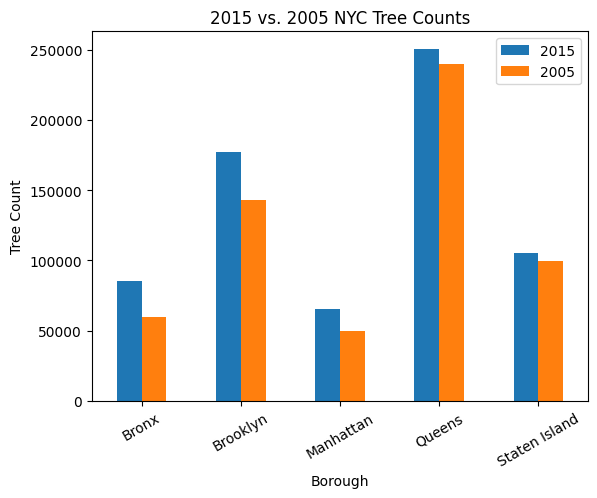

In [18]:
treecount.plot(kind='bar')
plt.title('2015 vs. 2005 NYC Tree Counts')
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.xlabel('Borough')
plt.ylabel('Tree Count')

In [19]:
# read data for 2014, year prior to MillionTreeNYC initiative
pm25_daily_2014= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_88101_2014.zip', parse_dates=['Date Local']) 
O3_daily_2014= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_44201_2014.zip')
SO2_daily_2014= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_42401_2014.zip')
CO_daily_2014= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_42101_2014.zip')
NO2_daily_2014= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_42602_2014.zip')

In [20]:
pm25_daily_2014.shape

(350442, 29)

In [21]:
O3_daily_2014.shape

(388613, 29)

In [22]:
SO2_daily_2014.shape

(321322, 29)

In [23]:
CO_daily_2014.shape

(214950, 29)

In [24]:
NO2_daily_2014.shape

(149395, 29)

In [25]:
pm25_daily_2014.head(20)
pm25_daily_2014.sample(10)
pm25_daily_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350442 entries, 0 to 350441
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   State Code           350442 non-null  int64         
 1   County Code          350442 non-null  int64         
 2   Site Num             350442 non-null  int64         
 3   Parameter Code       350442 non-null  int64         
 4   POC                  350442 non-null  int64         
 5   Latitude             350442 non-null  float64       
 6   Longitude            350442 non-null  float64       
 7   Datum                350442 non-null  object        
 8   Parameter Name       350442 non-null  object        
 9   Sample Duration      350442 non-null  object        
 10  Pollutant Standard   227433 non-null  object        
 11  Date Local           350442 non-null  datetime64[ns]
 12  Units of Measure     350442 non-null  object        
 13  Event Type    

In [26]:
pm25_daily_2014.columns
pm25_daily_2014.index
pm25_daily_2014.values

array([[1, 3, 10, ..., 'Fairhope', 'Daphne-Fairhope-Foley, AL',
        '2021-11-08'],
       [1, 3, 10, ..., 'Fairhope', 'Daphne-Fairhope-Foley, AL',
        '2021-11-08'],
       [1, 3, 10, ..., 'Fairhope', 'Daphne-Fairhope-Foley, AL',
        '2021-11-08'],
       ...,
       [78, 10, 12, ..., 'Not in a city', nan, '2021-11-08'],
       [78, 10, 12, ..., 'Not in a city', nan, '2021-11-08'],
       [78, 10, 12, ..., 'Not in a city', nan, '2021-11-08']],
      dtype=object)

In [27]:
pm25_NY_14 = pm25_daily_2014.loc[(pm25_daily_2014['County Name']== 'New York') , ['Site Num', 'Date Local', 'AQI']]
pm25_NY_14

,Site Num,Date Local,AQI
226249,79,2014-01-02,47.0
226250,79,2014-01-05,80.0
226251,79,2014-01-08,51.0
226252,79,2014-01-17,60.0
226253,79,2014-01-20,40.0
...,...,...,...
226692,134,2014-12-19,18.0
226693,134,2014-12-22,52.0
226694,134,2014-12-25,20.0
226695,134,2014-12-28,54.0


(array([16071., 16130., 16191., 16252., 16314., 16375., 16436.]),
 [Text(16071.0, 0, '2014-01'),
  Text(16130.0, 0, '2014-03'),
  Text(16191.0, 0, '2014-05'),
  Text(16252.0, 0, '2014-07'),
  Text(16314.0, 0, '2014-09'),
  Text(16375.0, 0, '2014-11'),
  Text(16436.0, 0, '2015-01')])

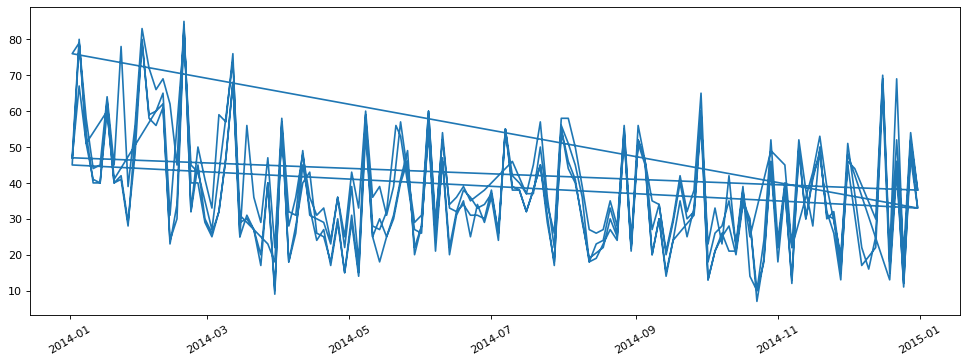

In [28]:
# plot the time series of AQI 
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(pm25_NY_14['Date Local'], pm25_NY_14['AQI'])
plt.xticks(rotation = 30, horizontalalignment = 'center')

In [29]:
# read data for 2016, year following MillionTreeNYC initiative
pm25_daily_2016= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_88101_2015.zip', parse_dates=['Date Local']) 
O3_daily_2016= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_44201_2015.zip')
SO2_daily_2016= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_42401_2015.zip')
CO_daily_2016= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_42101_2015.zip')
NO2_daily_2016= pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_42602_2015.zip')

In [30]:
pm25_daily_2016.shape

(374867, 29)

In [31]:
O3_daily_2016.shape

(386404, 29)

In [32]:
SO2_daily_2016.shape

(321102, 29)

In [33]:
CO_daily_2016.shape

(212648, 29)

In [34]:
NO2_daily_2016.shape

(154940, 29)

In [35]:
pm25_daily_2016.head(20)
pm25_daily_2016.sample(10)
pm25_daily_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374867 entries, 0 to 374866
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   State Code           374867 non-null  int64         
 1   County Code          374867 non-null  int64         
 2   Site Num             374867 non-null  int64         
 3   Parameter Code       374867 non-null  int64         
 4   POC                  374867 non-null  int64         
 5   Latitude             374867 non-null  float64       
 6   Longitude            374867 non-null  float64       
 7   Datum                374867 non-null  object        
 8   Parameter Name       374867 non-null  object        
 9   Sample Duration      374867 non-null  object        
 10  Pollutant Standard   242468 non-null  object        
 11  Date Local           374867 non-null  datetime64[ns]
 12  Units of Measure     374867 non-null  object        
 13  Event Type    

In [36]:
pm25_daily_2016.columns
pm25_daily_2016.index
pm25_daily_2016.values

array([[1, 3, 10, ..., 'Fairhope', 'Daphne-Fairhope-Foley, AL',
        '2021-11-08'],
       [1, 3, 10, ..., 'Fairhope', 'Daphne-Fairhope-Foley, AL',
        '2021-11-08'],
       [1, 3, 10, ..., 'Fairhope', 'Daphne-Fairhope-Foley, AL',
        '2021-11-08'],
       ...,
       [78, 10, 12, ..., 'Not in a city', nan, '2021-11-08'],
       [78, 10, 12, ..., 'Not in a city', nan, '2021-11-08'],
       [78, 10, 12, ..., 'Not in a city', nan, '2021-11-08']],
      dtype=object)

In [37]:
pm25_NY_16 = pm25_daily_2016.loc[(pm25_daily_2016['County Name']== 'New York') , ['Site Num', 'Date Local', 'AQI']]
pm25_NY_16

,Site Num,Date Local,AQI
241697,79,2015-01-03,33.0
241698,79,2015-01-09,38.0
241699,79,2015-01-12,57.0
241700,79,2015-01-18,61.0
241701,79,2015-01-21,30.0
...,...,...,...
242156,134,2015-12-17,30.0
242157,134,2015-12-20,28.0
242158,134,2015-12-23,56.0
242159,134,2015-12-26,19.0


(array([16436., 16495., 16556., 16617., 16679., 16740., 16801.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16495.0, 0, '2015-03'),
  Text(16556.0, 0, '2015-05'),
  Text(16617.0, 0, '2015-07'),
  Text(16679.0, 0, '2015-09'),
  Text(16740.0, 0, '2015-11'),
  Text(16801.0, 0, '2016-01')])

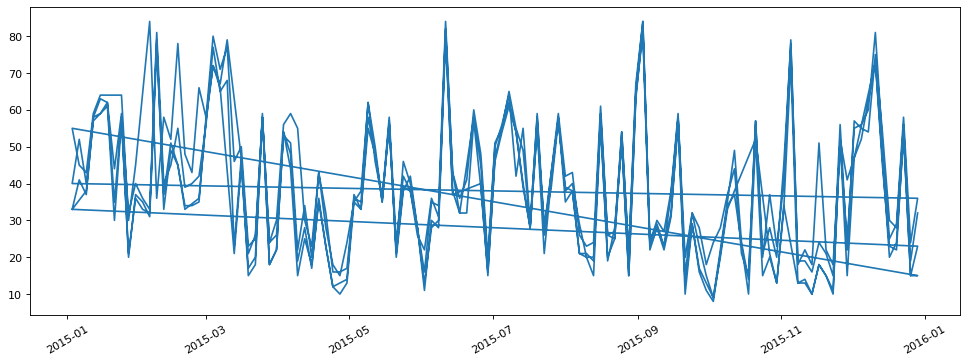

In [38]:
# plot the time series of AQI 
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(pm25_NY_16['Date Local'], pm25_NY_16['AQI'])
plt.xticks(rotation = 30, horizontalalignment = 'center')

In [39]:
# extract site numbers, date and AQI for 2014
pm25_NY_14 = pm25_daily_2014.loc[(pm25_daily_2014['County Name']== 'New York') & (pm25_daily_2014['Site Num']== 79) , ['Site Num', 'Date Local', 'AQI']]
pm25_NY_14[0:30]

,Site Num,Date Local,AQI
226249,79,2014-01-02,47.0
226250,79,2014-01-05,80.0
226251,79,2014-01-08,51.0
226252,79,2014-01-17,60.0
226253,79,2014-01-20,40.0
226254,79,2014-01-23,41.0
226255,79,2014-01-26,28.0
226256,79,2014-02-01,79.0
226257,79,2014-02-04,59.0
226258,79,2014-02-07,60.0


In [40]:
# derive summary statistics for year 2014
print(pm25_NY_14.describe())

       Site Num         AQI
count     231.0  231.000000
mean       79.0   34.580087
std         0.0   15.356951
min        79.0    7.000000
25%        79.0   24.000000
50%        79.0   31.000000
75%        79.0   45.000000
max        79.0   84.000000


In [41]:
# extract site numbers, date and AQI for 2016
pm25_NY_16 = pm25_daily_2016.loc[(pm25_daily_2016['County Name']== 'New York') & (pm25_daily_2016['Site Num']== 79) , ['Site Num', 'Date Local', 'AQI']]
pm25_NY_16[0:30]

,Site Num,Date Local,AQI
241697,79,2015-01-03,33.0
241698,79,2015-01-09,38.0
241699,79,2015-01-12,57.0
241700,79,2015-01-18,61.0
241701,79,2015-01-21,30.0
241702,79,2015-01-24,57.0
241703,79,2015-01-27,21.0
241704,79,2015-01-30,36.0
241705,79,2015-02-02,33.0
241706,79,2015-02-05,32.0


In [42]:
# derive summary statistics for year 2016
print(pm25_NY_16.describe())

       Site Num         AQI
count     226.0  226.000000
mean       79.0   35.535398
std         0.0   18.289793
min        79.0    8.000000
25%        79.0   20.000000
50%        79.0   33.000000
75%        79.0   51.000000
max        79.0   82.000000
